In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('AdjustedClosingPrices.csv')
df.head(3)

,Date,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
0,2000-01-03,46.354670,30.172580,3.660058,3.326019,9.639804,0.019,16.274667,32.947692,7.912229,...,25.380447,8.810155,32.639550,35.933610,26.056526,7.151686,19.207609,118.750,7.452527,43.820247
1,2000-01-04,42.813681,30.312376,3.351477,3.098946,9.364382,0.019,14.909395,31.280900,7.829816,...,24.433043,9.013020,31.170373,35.116937,25.557438,7.151686,18.314232,110.750,7.302727,41.698321
2,2000-01-05,40.157947,32.059823,3.400523,3.339381,9.347165,0.019,15.204175,31.737555,7.706187,...,24.682360,9.360790,31.448326,34.348304,26.950724,7.275321,19.257241,102.625,7.340181,41.648973


In [3]:
df.shape

(4173, 468)

In [4]:
df['Date'] = pd.to_datetime(df.Date)

In [5]:
df.dtypes

Date    datetime64[ns]
A              float64
AA             float64
AAPL           float64
ABC            float64
ABT            float64
ACS            float64
ADBE           float64
ADI            float64
ADM            float64
ADP            float64
ADSK           float64
AEE            float64
AEP            float64
AES            float64
AET            float64
AFL            float64
AGN            float64
AIG            float64
AIV            float64
AIZ            float64
AKAM           float64
AKS            float64
ALL            float64
AMAT           float64
AMD            float64
AMGN           float64
AMP            float64
AMT            float64
AMZN           float64
             ...      
VMC            float64
VNO            float64
VRSN           float64
VTR            float64
VZ             float64
WAT            float64
WDC            float64
WEC            float64
WFC            float64
WFR            float64
WHR            float64
WIN            float64
WM         

In [6]:
df = df.set_index('Date')
df.head(4)

,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,46.354670,30.172580,3.660058,3.326019,9.639804,0.019,16.274667,32.947692,7.912229,29.184633,...,25.380447,8.810155,32.639550,35.933610,26.056526,7.151686,19.207609,118.750000,7.452527,43.820247
2000-01-04,42.813681,30.312376,3.351477,3.098946,9.364382,0.019,14.909395,31.280900,7.829816,29.184633,...,24.433043,9.013020,31.170373,35.116937,25.557438,7.151686,18.314232,110.750000,7.302727,41.698321
2000-01-05,40.157947,32.059823,3.400523,3.339381,9.347165,0.019,15.204175,31.737555,7.706187,28.904013,...,24.682360,9.360790,31.448326,34.348304,26.950724,7.275321,19.257241,102.625000,7.340181,41.648973
2000-01-06,38.628883,31.640436,3.106247,3.593170,9.674231,0.019,15.328291,30.869910,7.747397,29.289867,...,24.831950,9.273847,31.686571,31.369849,28.344010,7.284835,18.860185,92.046875,7.277768,42.241139


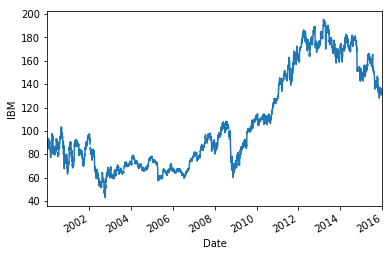

In [7]:
df.IBM.plot()
plt.ylabel('IBM')

In [8]:
df.isnull().sum().sum()

184024

In [9]:
df1 = df.replace(0, np.nan)

In [10]:
# fill the missing value
# axis = 0 is add by column 1 means filling by rows
df2 = df1.fillna(method='ffill',axis=0).fillna(method='bfill',axis=0)
df2.isnull().sum().sum()

0

In [11]:
# If the price is 0, change that to 
df_log = np.log(df2)
df_log.isnull().sum().sum()

0

In [12]:
df_r = df_log - df_log.shift()

In [13]:
df_r.isnull().sum().sum()

467

In [14]:
# drop the first row
df_r1 = df_r.drop(df_r.index[0])
df_r1.isnull().sum().sum()

0

In [15]:
today = df_r1.IBM.shift(periods=1)[2:]
yesterday = df_r1.IBM.shift(periods=2)[2:]
tomorrow = df_r1.IBM[2:]

In [24]:
#start using tensorflow
today_s = today.values
yesterday_s = yesterday.values
tomorrow_s = tomorrow.values

In [27]:
w1 = tf.Variable([1.0], dtype='float32')
w2 = tf.Variable([1.0], dtype='float32')
b = tf.Variable([1.0], dtype='float32')

In [33]:
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [47]:
loss = tf.reduce_mean(tf.square(y - (x1 * w2 + x2 * w2 + b)))

In [65]:
STEP_SIZE = 0.5

In [66]:
optimizer = tf.train.GradientDescentOptimizer(STEP_SIZE)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [67]:
sess = tf.Session()
MAXSTEPS = 100000
MOD = 10000
#initialize all variables
sess.run(init)

In [68]:
for step in range(MAXSTEPS+1):
    (_, w1opt, w2opt, bopt, loss_opt) = sess.run([train,w1,w2,b,loss],feed_dict={x1:yesterday_s, x2:today_s, y:tomorrow_s})
    if (step % MOD) == 0:
        print(step, loss_opt)

0 1.00104
10000 0.000272223
20000 0.000272208
30000 0.000272208
40000 0.000272208
50000 0.000272208
60000 0.000272208
70000 0.000272208
80000 0.000272208
90000 0.000272208
100000 0.000272208


In [52]:
tomorrow_s.var()

0.00027268764526033797